# CLIMADA EXERCISE 2

## CLIMADA exercise to the lecture
### Climate Change Uncertainty and Risk: from Probabilistic Forecasts to Economics of Climate Adaptation

**Prof. Reto Knutti and Prof. David Bresch** <br>
Spring Term 2022<br>
<br>
**Tutors**<br>
Liviana Klein (liviana.klein@env.ethz.ch<br>
Marius Egli (marius.egli@env.ethz.ch<br>
Simona Meiler (simona.meiler@usys.ethz.ch)<br>
Samuel Lüthi (samuel.luethi@usys.ethz.ch)<br>
Zélie Stalhandske (zelie.stalhandske@usys.ethz.ch)<br>


All relevant course information to be found here:<br>
http://www.iac.ethz.ch/edu/courses/master/modules/climate-risk.html<br>
Everything for CLIMADA (tutorials, code) can be downloaded from GitHub:<br>
https://github.com/CLIMADA-project/climada_python

In the lecture, we've learned that catastrophe risk hinges on the three components hazard, exposure and vulnerability. In the first exercise we saw how CLIMADA generates a probabilistic hazard event set for tropical cyclones in Taiwan, based on the experience of past storms. In this exercise we'll first create an exposure layer and set up the vulnerability component to subsequently run our first impact calculation. We'll then learn how to treat uncertainty and touch on the effects of insurance. To finish off, we look into the effect of discounting and run a cost-benefit analysis.

## 2. Exposure creation

In this part you will create the exposure describing the assets (infrastructure) which might be at risk in Taiwan. In CLIMADA the class [`Exposures`](https://climada-python.readthedocs.io/en/latest/tutorial/1_main_climada.html#Exposures) and more specific the derived class [`LitPop`](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_LitPop.html) are defined to hold all information of the assets at risk. Click on the respective links to learn how to use these classes. We here show you how to get a 4km litpop object through the CLIMADA API, you can learn more about the API on this link.


### Create the exposure based on nightlight:

BlackMarble is a simple approach to approximate economic exposure. It uses nightlight luminosity retrieved from satelite data to spatially distribute a socio-economic variable (i.e. GDP, total assets).

Execute the following code to create the exposure based on distribution of nightlight luminosity.

/usr/local/Miniconda3-envs/envs/2022/envs/teach_climada_3.1.1/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:>

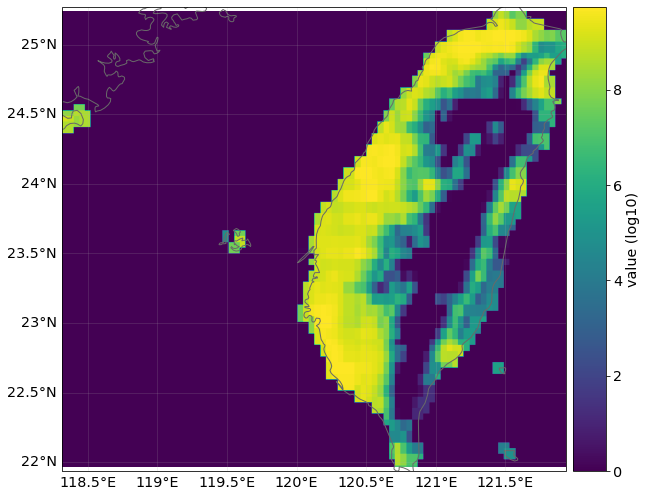

In [1]:
from climada.entity import LitPop
from climada.util.api_client import Client
client = Client()
TWN_nightlight = client.get_exposures('litpop', properties={'country_iso3alpha':'TWN', 'exponents': '(3,0)'})
TWN_nightlight.plot_raster()

Compare the plot with a map of Taiwan (use i.e. google maps). What features can you recognize in the exposure? Where do you think lay limits of this approach?

`print` the variable TWN_nightlight and examine its structure and content.

In [2]:
print(TWN_nightlight)

tag:  File: 
 Description: LitPop Exposure for ['TWN'] at 150 as, year: 2018, financial mode: pc, exp: [3, 0], admin1_calc: False
ref_year: 2018
value_unit: USD
meta: {'width': 88, 'height': 81, 'crs': <Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, 'transform': Affine(0.041666666666671404, 0.0, 118.29166666666663,
       0.0, -0.04166666666666785, 25.291666666666586)}
crs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
data:
             value                    geometry   latitude   longitude  \
0     1.517890e+04  POINT (121.52083 22.06250)  22.062

### Create the exposure using LitPop

The LitPop class can also consider a second layer in order to produce the distribution of assets, what is the second input?

Get a another exposure for Taiwan with a similar resolution as the first one considering this second input. 



In [3]:
LitPop.from_countries

<bound method LitPop.from_countries of <class 'climada.entity.exposures.litpop.litpop.LitPop'>>

/usr/local/Miniconda3-envs/envs/2022/envs/teach_climada_3.1.1/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:>

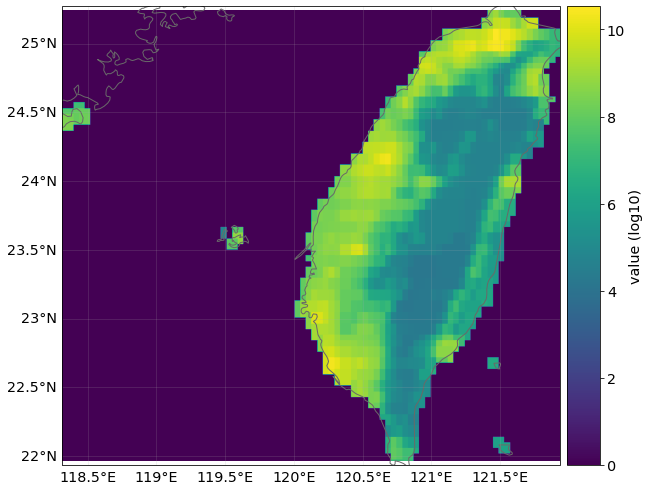

In [4]:
from climada.entity import LitPop
client = Client()
TWN_nightlight = client.get_exposures('litpop', properties={'country_iso3alpha':'TWN', 'exponents': '(1,1)'})
TWN_nightlight.plot_raster()

In [5]:
help(LitPop)

Help on class LitPop in module climada.entity.exposures.litpop.litpop:

class LitPop(climada.entity.exposures.base.Exposures)
 |  LitPop(*args, meta=None, tag=None, ref_year=2018, value_unit='USD', crs=None, **kwargs)
 |  
 |  Holds geopandas GeoDataFrame with metada and columns (pd.Series) defined in
 |  Attributes of Exposures class.
 |  LitPop exposure values are disaggregated proportional to a combination of
 |  nightlight intensity (NASA) and Gridded Population data (SEDAC).
 |  Total asset values can be produced capital, population count,
 |  GDP, or non-financial wealth.
 |  
 |  Calling sequence example:
 |  country_names = ['CHE', 'Austria']
 |  exp = LitPop.from_countries(country_names)
 |  exp.plot()
 |  
 |  Attributes
 |  ----------
 |  exponents : tuple of two integers, optional
 |      Defining powers (m, n) with which lit (nightlights) and pop (gpw)
 |      go into Lit**m * Pop**n. The default is (1,1).
 |  fin_mode : str, optional
 |      Socio-economic value to be use

**2.a)** What is the difference between the two assets representation? (2-4 sentences)



*Write your answer to 2.a) in this cell*

When a high power is assigned to nightlight and not considering population, the west is much more vulnerable, while there are nearly no assets considered in the middle; when nightlight and poulation is assigned with equally weighetd power, the area is more evenly distributed with lower peaks at the west.

**2.b)** Which exposures type is in your opinion better suited to represent the assets of Taiwan for the risk assessment of tropical cyclones? (2-4 sentences)

*Write your answer to 2.b) in this cell*

It is better when considering both population and nightlight since these populated area in the middle exist many immobile assets and these should also be considered exposure. In fact, these less developed area may have fewer stable properties, which are more vulnerable to the tropical cyclones.

## 3. Vulnerability

In order to calculate the impacts for a given hazard event set and a given exposure you need to load the corresponding impact functions. Impact functions are used to represent the vulnerability component by relating a wind intensity to the mean damage ratio at each centroid. In CLIMADA the class [`ImpFuncSet`](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_ImpactFuncSet.html) holds all information of the impact functions. In CLIMADA all information of exposure, vulnerability and adaption measures is stored in one container called `Entity`. We provide an excel file, which contains most information needed for the rest of the exercise.

### Read the entity file

The following commands reads the Entity from an Excel ﬁle.

In [6]:
from climada.entity import Entity
from pathlib import Path
file_name_ent = ('entity_exercise_LitPop.xlsx') # make sure to adjsut the path accordingly
ent_TWN = Entity()
ent_TWN.read_excel(file_name_ent)

2022-06-24 00:57:17,223 - climada.entity.entity_def - WARNING - The use of Entity.read_excel is deprecated.Use Entity.from_excel instead.


However, no information on `Exposure` and `impact_funcs` is defined in the Excel file. Thus, we first add the LitPop `Exposure` we calculated above.

In [7]:
ent_TWN.exposures = TWN_nightlight # You might need to adjust the variable name to match the name of your LitPop exposure
ent_TWN.check()

 As always, we recommend to quickly investigate the components and data structure that we work with. Use i.e. `help(ent_TWN.exposures)`

In [8]:
help(ent_TWN.exposures)

Help on Exposures in module climada.entity.exposures.base object:

class Exposures(builtins.object)
 |  Exposures(*args, meta=None, tag=None, ref_year=2018, value_unit='USD', crs=None, **kwargs)
 |  
 |  geopandas GeoDataFrame with metada and columns (pd.Series) defined in
 |  Attributes.
 |  
 |  Attributes
 |  ----------
 |  tag : Tag
 |      metada - information about the source data
 |  ref_year : int
 |      metada - reference year
 |  value_unit : str
 |      metada - unit of the exposures values
 |  latitude : pd.Series
 |      latitude
 |  longitude : pd.Series
 |      longitude
 |  crs : dict or crs
 |      CRS information inherent to GeoDataFrame.
 |  value : pd.Series
 |      a value for each exposure
 |  impf_ : pd.Series, optional
 |      e.g. impf_TC. impact functions id for hazard TC.
 |      There might be different hazards defined: impf_TC, impf_FL, ...
 |      If not provided, set to default 'impf_' with ids 1 in check().
 |  geometry : pd.Series, optional
 |      geo

### Impact functions

As mentioned above, impact functions are used to represent the vulnerability component by relating a wind intensity to the mean damage ratio (MDR) at each centroid. The MDR can be unserstood as the product of percentage of affected assets (PAA) and the mean damage degree (MDD). Thus, MDR = MDD * PAA. For simlicity, we assume in this exercise that all assets are affected, thus PAA==1, and only model MDD.

As it is common practice in natural hazard impact modelling we use a sigmoid-type impact function proposed by Emanuel (2011) and calibrated by Eberenz et al. (2020):

\begin{equation}
    f_{emanuel} = \frac{v_{n}^{3}}{1+v_{n}^{3}}
\end{equation}

with

\begin{equation}
    v_n = \frac{MAX[(V-V_{thresh}), 0]}{V_{half}-V_{thresh}}
\end{equation}

where $V$ denotes the wind speed at a specific grid point. $V_{thresh}$, the minimum intensity where damages occur and $V_{half}$, which can be seen as the steepness of the sigmoid function, are the two paramaters that need calibration. In this exercise we set $V_{thresh}$ = 25.7 m/s and $V_{half}$ = 136.8 m/s.

Modify the code below to implement the impact function.

In [9]:
import numpy as np
from climada.entity import ImpactFunc, ImpactFuncSet

ImpF = ImpactFunc()
ImpF.id = 1
ImpF.name = 'Emanuel'
ImpF.intensity_unit = 'm/s'
ImpF.haz_type = 'TC'
ImpF.intensity = np.arange(0, 121, 5) # intensity range over which the ImpF is defined


In [10]:
# Define PAA 
# this needs to be a np.array with the same shape of ImpF.intensity and constantly equalling 1

# Your code comes here
ImpF.paa = np.ones(ImpF.intensity.shape)
ImpF.mdd = np.ones(ImpF.intensity.shape)

Implement the here the Emanuel function and make sure that the function does not become negative

Hint: To create the function $V$ can be set to `ImpF.intensity`

In [11]:
# Your code comes here
v_thresh = 25.7
v_half = 136.8

# emanuel func
def f_emanuel(v_half, v_thresh,V):
    v_n = max((V-v_thresh),0)/(v_half- v_thresh)
    return v_n**3/1+v_n**3

ImpF.mdd = np.array([f_emanuel(v_half, v_thresh, V) for V in ImpF.intensity])

We then append it to the entity container in the correct form and plot it

<AxesSubplot:title={'center':'TC 1: Emanuel'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

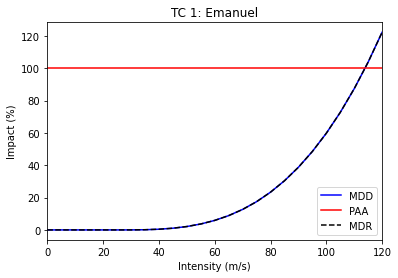

In [12]:
ent_TWN.impf_set = ImpactFuncSet()
ent_TWN.impf_set.append(ImpF)
ent_TWN.impf_set.plot()

Now, we have everything we need to calculate the impacts.

## 4. Impact calculation

In this part you will calculate the impacts of tropical cyclones in Taiwan. The module called engine with the class [`Impact`](https://climada-python.readthedocs.io/en/latest/tutorial/1_main_climada.html#Impact) is used to calculate the impacts and store the results. The tutorial explains how to use this class.

Use the `Hazard` we created in 1.), the `Exposures` we created in 2.) and the `Entity` resp. the `ImpFuncSet` we generated in 3.).

Reload the hazard created in 1.) and use the following command to compute the impacts (make sure that the variables are named correctly)

2022-06-24 00:57:18,579 - climada.hazard.base - WARNING - The use of Hazard.read_hdf5 is deprecated.Use Hazard.from_hdf5 instead.


/usr/local/Miniconda3-envs/envs/2022/envs/teach_climada_3.1.1/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


2022-06-24 00:57:19,544 - climada.hazard.base - WARNING - The use of Hazard.read_hdf5 is deprecated.Use Hazard.from_hdf5 instead.


/usr/local/Miniconda3-envs/envs/2022/envs/teach_climada_3.1.1/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:title={'center':'TC max intensity at each point'}>

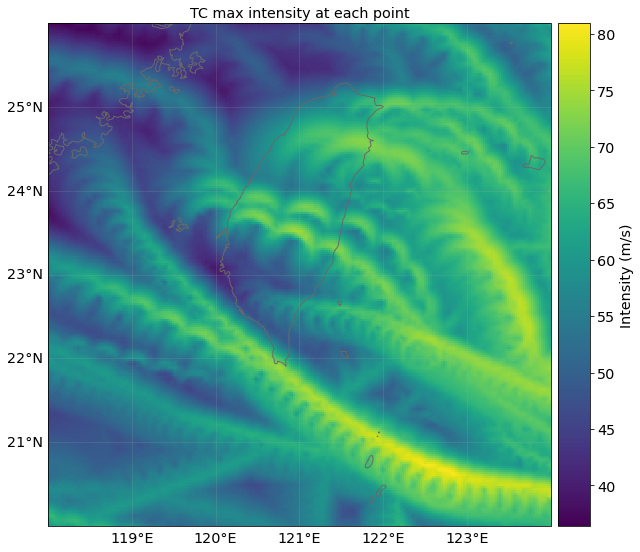

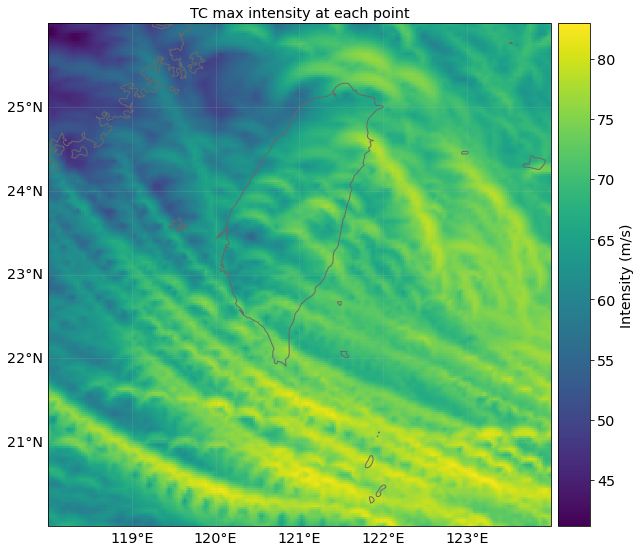

In [13]:
# use this cell to load the hazard you created in Exercise 1
from climada.hazard import TCTracks, Centroids, TropCyclone
file_name_haz = 'data_climada\tc_WP.hdf5' # enter path to your historic dataset
tc_WP = TropCyclone()
tc_WP.read_hdf5(file_name_haz)
tc_WP.plot_intensity(0) # check that it's loaded correctly

file_name_haz_proba = 'data_climada\tc_WP_proba.hdf5' # enter path to your porbabilistic dataset
tc_WP_proba = TropCyclone()
tc_WP_proba.read_hdf5(file_name_haz_proba)
tc_WP_proba.plot_intensity(0) # check that it's loaded correctly

In [14]:
from climada.engine import Impact

imp_TWN = Impact()
imp_TWN.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP)

imp_TWN_proba = Impact()
imp_TWN_proba.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP_proba)

**4.a)** What percentage of the historic and the probabilistic storm set actually cause impacts? Use the calculated Impact at event `imp_TWN.at_event` for this purpose. Identify the largest impact of the historic TC, ﬁnd its corresponding wind ﬁeld and plot it.

/usr/local/Miniconda3-envs/envs/2022/envs/teach_climada_3.1.1/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


8.069% of the historic storm set caused impacts
7.743% of the probabilistic storm set caused impacts
From the plot, the largest impact of the historic TC is from the Event ID 606, named 22008268N12140


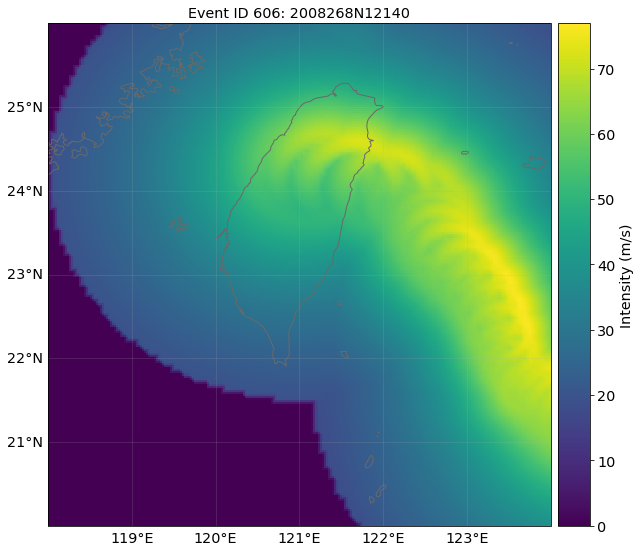

In [15]:
hist_percen = sum(imp_TWN.at_event >0)/ imp_TWN.at_event.shape[0]
prob_percen = sum(imp_TWN_proba.at_event >0)/ imp_TWN_proba.at_event.shape[0]

max_impact_id = imp_TWN.event_id[ imp_TWN.at_event.argmax() ]
tc_WP.plot_intensity(event = max_impact_id)

print(str(round(hist_percen*100, 3)) + '%' + ' of the historic storm set caused impacts')
print(str(round(prob_percen*100, 3)) + '%' + ' of the probabilistic storm set caused impacts')
print('From the plot, the largest impact of the historic TC is from the Event ID 606, named 22008268N12140')

### Calculate the Average Annual Impact (AAI)

Since we are considering a probabilistic set the AAI is a reasonable quantity to look at. The AAI is the sum of the frequency-weighted impacts.

**4.b)** What is your calculated AAI? Show us your code to calculate it.

In [16]:
aai = (imp_TWN_proba.aai_agg)
aai

5873803992.218149

### Calculate the Impact Exceedence Frequency Curve

The impact exceedance frequency curve relates the return period of each storm to its estimated impact. To calculate the return periods we assume that the most severe storm occurs once during the observational period; the second most severe storm returns twice and so on. Have a close look at the method `calc_freq_curve()`, which computes the impact exceedance frequency curve for a given hazard set. 

In [17]:
freq_curve_TWN = imp_TWN.calc_freq_curve(np.arange (27))  
freq_curve_TWN_proba = imp_TWN_proba.calc_freq_curve(np.arange(27))

**4.c)** Plot the impact exceedance frequency curve for the historical as well as the probabilistic storm set. What is the value of a 25-year return period impact for the two hazard sets? What does this mean for the return period of TC Herb (which we got to know in Ex 1.)? (4-6 sentences)

Text(25, 26221118611.45807, 'x')

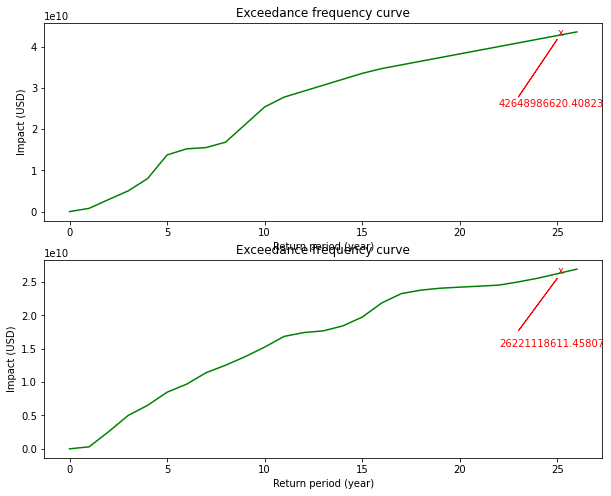

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize= (10,8))

freq_curve_TWN.plot(axis = ax[0], color = 'green')
freq_curve_TWN_proba.plot(axis = ax[1], color = 'green')

ax[0].annotate(freq_curve_TWN.impact[25], (22, freq_curve_TWN.impact[10]), color = 'red')
ax[0].arrow(23, freq_curve_TWN.impact[11], 2, freq_curve_TWN.impact[24] - freq_curve_TWN.impact[11],length_includes_head = 'False', color = 'red')
ax[0].annotate('x', (25, freq_curve_TWN.impact[25]), color = 'red')

ax[1].annotate(freq_curve_TWN_proba.impact[25], (22, freq_curve_TWN_proba.impact[10]), color = 'red')
ax[1].arrow(23, freq_curve_TWN_proba.impact[13], 2, freq_curve_TWN_proba.impact[24] - freq_curve_TWN_proba.impact[13],length_includes_head = 'Falsa', color = 'red')
ax[1].annotate('x', (25, freq_curve_TWN_proba.impact[25]), color = 'red')

*Write your answer to 4.c) in this cell*

## 5. Dealing with uncertainty

While we can rely on satelite data for the `hazard` and the `exposure` components of our model, the `impact function` are empirically fitted functions that come along with large uncertainties. Examine the elements of the impact functions in `ent_TWN.impact_funcs`. We are now going to modify some of the fields in this class to evaluate uncertainties in the impact calculation.

In your `ent_TWN.exposures` you can check the field `if_` which is defined for all your assets. This selects the impact function used in the impact calculation. So far all assets were assigned the impact function “1” as we didn't define anything further.


In [19]:
ent_TWN.exposures.gdf.head()

,value,geometry,latitude,longitude,region_id,impf_,centr_TC
0,9.564143e+05,POINT (121.52083 22.06250),22.062500,121.520833,158,1,3458
1,1.113794e+06,POINT (121.56250 22.02083),22.020833,121.562500,158,1,3359
2,2.856573e+06,POINT (121.47917 22.64583),22.645833,121.479167,158,1,4457
3,0.000000e+00,POINT (120.10417 23.52083),23.520833,120.104167,158,1,5835
4,0.000000e+00,POINT (120.06250 23.47917),23.479167,120.062500,158,1,5734


We'll now create another impact function with `ImpF.id = 2`, append it to our `ImpFuncSet` and then subsequantly adjust `if_` in the `exposure.gdf` to run the calculation with a new impact function.

In [20]:
ImpF_new = ImpactFunc()
ImpF_new.id = 2
ImpF_new.name = 'New IF'
ImpF_new.intensity_unit = 'm/s'
ImpF_new.haz_type = 'TC'
ImpF_new.intensity = np.arange(0, 121, 5) # intensity range over which the ImpF is defined

**5.a)** Define a new impact function, append it to the `ImpFuncSet` and plot it. You can either create an impact function of the same type as in 3.) any vary the parameters or you can define an entirely new impact function. Make sure it is kept within the physically plausible boundaries (thus between 0% and 100%).

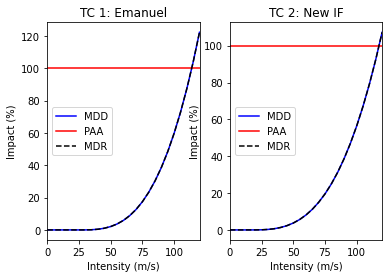

In [21]:
# Your code comes here
v_thresh = 16
v_half = 144

ImpF_new.mdd = np.array([f_emanuel(v_half, v_thresh, V) for V in ImpF_new.intensity])
ImpF_new.paa = np.ones(ImpF_new.intensity.shape)

ent_TWN.impf_set.append(ImpF_new)

ent_TWN.impf_set.plot()
plt.show()

**5.b)** Recalculate the impacts with the newly assigned impact functions and compare the AAI, the impact at 50 and at 250 year return period, as well as the impact exceedance frequency curve. Make sure you adjust the `if_` in the `exposure.gdf`. Discuss the differences? (2-4 sentences)

New aai:  15415510192.54039


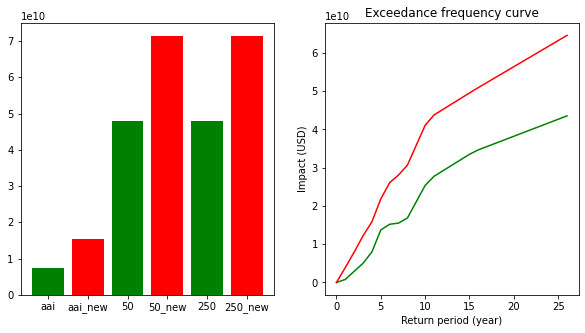

In [22]:
# Your code comes here
ent_TWN.exposures.gdf['impf_'] = 2;

imp_TWN_new = Impact()
imp_TWN_new.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP)

freq_curve_TWN_new = imp_TWN_new.calc_freq_curve(np.arange(27))
impact50 = imp_TWN.calc_freq_curve(np.arange(51)).impact[-1]
impact50_new = imp_TWN_new.calc_freq_curve(np.arange(51)).impact[-1]
impact250 = imp_TWN.calc_freq_curve(np.arange(251)).impact[-1]
impact250_new = imp_TWN_new.calc_freq_curve(np.arange(251)).impact[-1]

aai = (imp_TWN.aai_agg)
aai_new = (imp_TWN_new.aai_agg)
print('New aai: ',aai_new)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].bar(['aai','aai_new', '50', '50_new', '250', '250_new'], [aai, aai_new,impact50,impact50_new,impact250,impact250_new], color = ['green', 'red','green', 'red','green', 'red'])

freq_curve_TWN.plot(axis = ax[1], color = 'green')
freq_curve_TWN_new.plot(axis = ax[1], color = 'red')

plt.show()

*Write your answer to 5.b) in this cell*

**5.c)** Vary the parameter $V_{half}$ of the Emanuel function between 80 m/s and 200 m/s. Plot the respective average annual impact against the parameter and discuss the result (2-4 sentences).

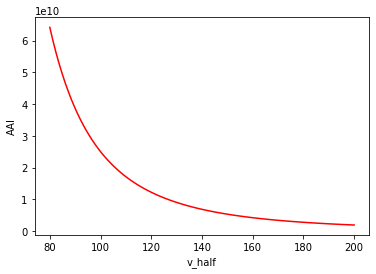

In [23]:
# Your code comes here
v_halfs = np.linspace(80,200,100)
intensities = []

v_thresh = 25.7
ent_TWN.exposures.gdf['impf_'] = 1;

for v_half in v_halfs:
    ImpF.mdd = np.array([f_emanuel(v_half, v_thresh, V) for V in ImpF.intensity])
    ent_TWN.impf_set.append(ImpF)
    imp_TWN.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP)
    intensities.append(imp_TWN.aai_agg)
plt.plot(v_halfs, intensities, color = 'red')
plt.xlabel('v_half')
plt.ylabel('AAI')
plt.show()

*Write your answer to 5.c) in this cell*

## 6. Effect of insurance


### Proportional insurance

**6.a)** To the calculated Impact at event, apply a proportional insurance of 30% (insure 30% of the impact). What is the change in AAI (the portion of the impact that remains to the insured after application of a 30% proportional insurance)?

Remember, for proportional insurance:
\begin{equation}
    I_{after} = I_{before} - I_{before} * s_{insured}
                = I_{before} * (1 - s_{insured})
\end{equation}

where $I_{after}$ is the impact that remains to the insured after application of insurance and $s_{insured}$ the share of the insurer. Make sure to make the calculations per event and recalculate the AAI.

In [24]:
# code comes here
ImpF.paa = ImpF.paa * 0.7
ImpF_new.paa = ImpF_new.paa * 0.7
imp_TWN.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP)
aai_prop_i = imp_TWN.aai_agg

print("AAI:",aai)
print("AAI for 30% proportional insuarance:",aai_prop_i)

#recalculate the AAI
ImpF.paa = ImpF.paa / 0.7
ImpF_new.paa = ImpF_new.paa / 0.7

AAI: 7495378855.86974
AAI for 30% proportional insuarance: 1358756531.6062777


### Non-proportional insurance

**6.b)** Now, let’s apply a non-proportional insurance. The insurance shall attach at the level of the 50-year impact (= the deductible) and cover all impacts up to the 100-year event. What is the effect on AAI (of the insured)?

Remember, for non-proportional insurance:
\begin{equation}
    I_{after} = I_{before} - min(max(I_{before}-d, 0) , c)
\end{equation}

where $d$ denotes the deductible and $c$ the cover. The cover is deﬁned as the maximum amount the non-proportional insurance is paying. Make sure to make the calculations per event and recalculate the AAI.

In [25]:
# code comes here
d = imp_TWN.calc_freq_curve(np.arange(51)).impact[-1]
c = max(imp_TWN.calc_freq_curve(np.arange(101)).impact)

ImpF.paa = [paa-min(max((paa-d),0),c) for paa in ImpF.paa]
imp_TWN.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP)
aai_non_prop_i = imp_TWN.aai_agg

print("AAI:", aai)
print("AAI for 30% proportional insuarance:", aai_prop_i)
print("AAI for non-proportional insuarance:", aai_non_prop_i)

AAI: 7495378855.86974
AAI for 30% proportional insuarance: 1358756531.6062777
AAI for non-proportional insuarance: 1941080759.4375405


**6.c)** As an insurance-taker, which type of insurance would you prefer and why?

We would prefer proportional insuarance because of the occurance of projection uncertainity.

**6.d)** Once you have completed task 9 (see later), repeat the application of the non-proportional insurance cover to the climate change scenario result, what is the effect on AAI now?

In [26]:
# code comes here
d = imp_TWN.calc_freq_curve(np.arange(51)).impact[-1]
c = max(imp_TWN.calc_freq_curve(np.arange(101)).impact)

ImpF.paa = [paa-min(max((paa-d),0),c) for paa in ImpF.paa]
imp_TWN.calc(ent_TWN.exposures, ent_TWN.impf_set, tc_WP)
aai_non_prop_i = imp_TWN.aai_agg

print("AAI:", aai)
print("AAI for 30% proportional insuarance:", aai_prop_i)
print("AAI for non-proportional insuarance:", aai_prop_i)

AAI: 7495378855.86974
AAI for 30% proportional insuarance: 1358756531.6062777
AAI for non-proportional insuarance: 1358756531.6062777


The effect of AAI remain the same for the both proportional and non-proportional insuarance 

## 7. Discounting and Cost-Beneﬁt Analysis (*voluntary*)

This section is voluntary and gives extra points. Before we formally proceed with the computations using the CLIMADA model, we will have a short hands-on exercise on the topic of discounting and on the comparison of costs and beneﬁts. The basics of these issues were covered in the lecture "Basics of economic evaluation...". The discounting and cost-benefit analysis Excel-ﬁle `Ex7_cost_benefit_exercise.xlsx` available on moodle or on this hub contains three worksheets: Question_1, Question_2 and Discounting_sheet.

### Question 1 - Cost-Benefit

This exercise will treat the basics of discounting on an example already discussed in the slides "Basics of economic evaluation..." section "Costs and beneﬁts example". We expect a climate related impact of 20 million USD in year 2028. On the mitigation side, we consider building a dam (costs) for 10 million USD this year (the year 2018) with maintenance costs of 1 million USD every second year (starting today).

**7.a)** Compute the Net Present Value (NPV) of the costs (prevention) and the beneﬁts (averted impacts) in the time table of this worksheet. Vary the interest rate and ﬁnd the corresponding rate at which the beneﬁts (still) outweigh the costs. What is the value of this interest rate?

*Write your answer to 7.a) in this cell*

**7.b)** Repeat the same exercise with a given yield curve (= time-dependent discount rate) in the lower table. Refer to the lecture notes for the corresponding formula. What is the impact of the time-dependent discount rate?

*Write your answer to 7.b) in this cell*

### Question 2 - Climate Policy Application

The table in this worksheet shows prevention costs and averted impacts for a climate change scenario. Get familiar with the data and the ﬁgures (also the formulas behind). The chart `Discounted cost/benefit` at the lower right part of the worksheet has to be finished by varying the discount rate and copying the costs and beneﬁts at the current year (2018) into the small table at the upper right hand side of the larger table. Note that the shape of both curves can be adjusted with an exponent at the very bottom of the table.

**7.c)** How does the cost/benefit ratio change with time and why? (2-4 sentences)

*Write your answer to 7.c) in this cell*

**7.d)** While it is not possible to discount some impacts such as damages to ecosystems or loss of human lifes in the first place, dicount rates are also subject to heated political debates in pure economic studies. What are the implication of higher (lower) discount rates for future generations? Is it justified to discount future expected damages? (4-6 sentences)

*Write your answer to 7.d) in this cell*